# MMM Analysis

In [36]:
# Import required packages
import pandas as pd
import statsmodels.api as sm
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from saturation import ExponentialSaturation
from carryover import ExponentialCarryover
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.options.display.float_format = '{:.2f}'.format

In [37]:
df = pd.read_csv('MMM_Data3.csv', skiprows=1, index_col='Date')

<AxesSubplot: >

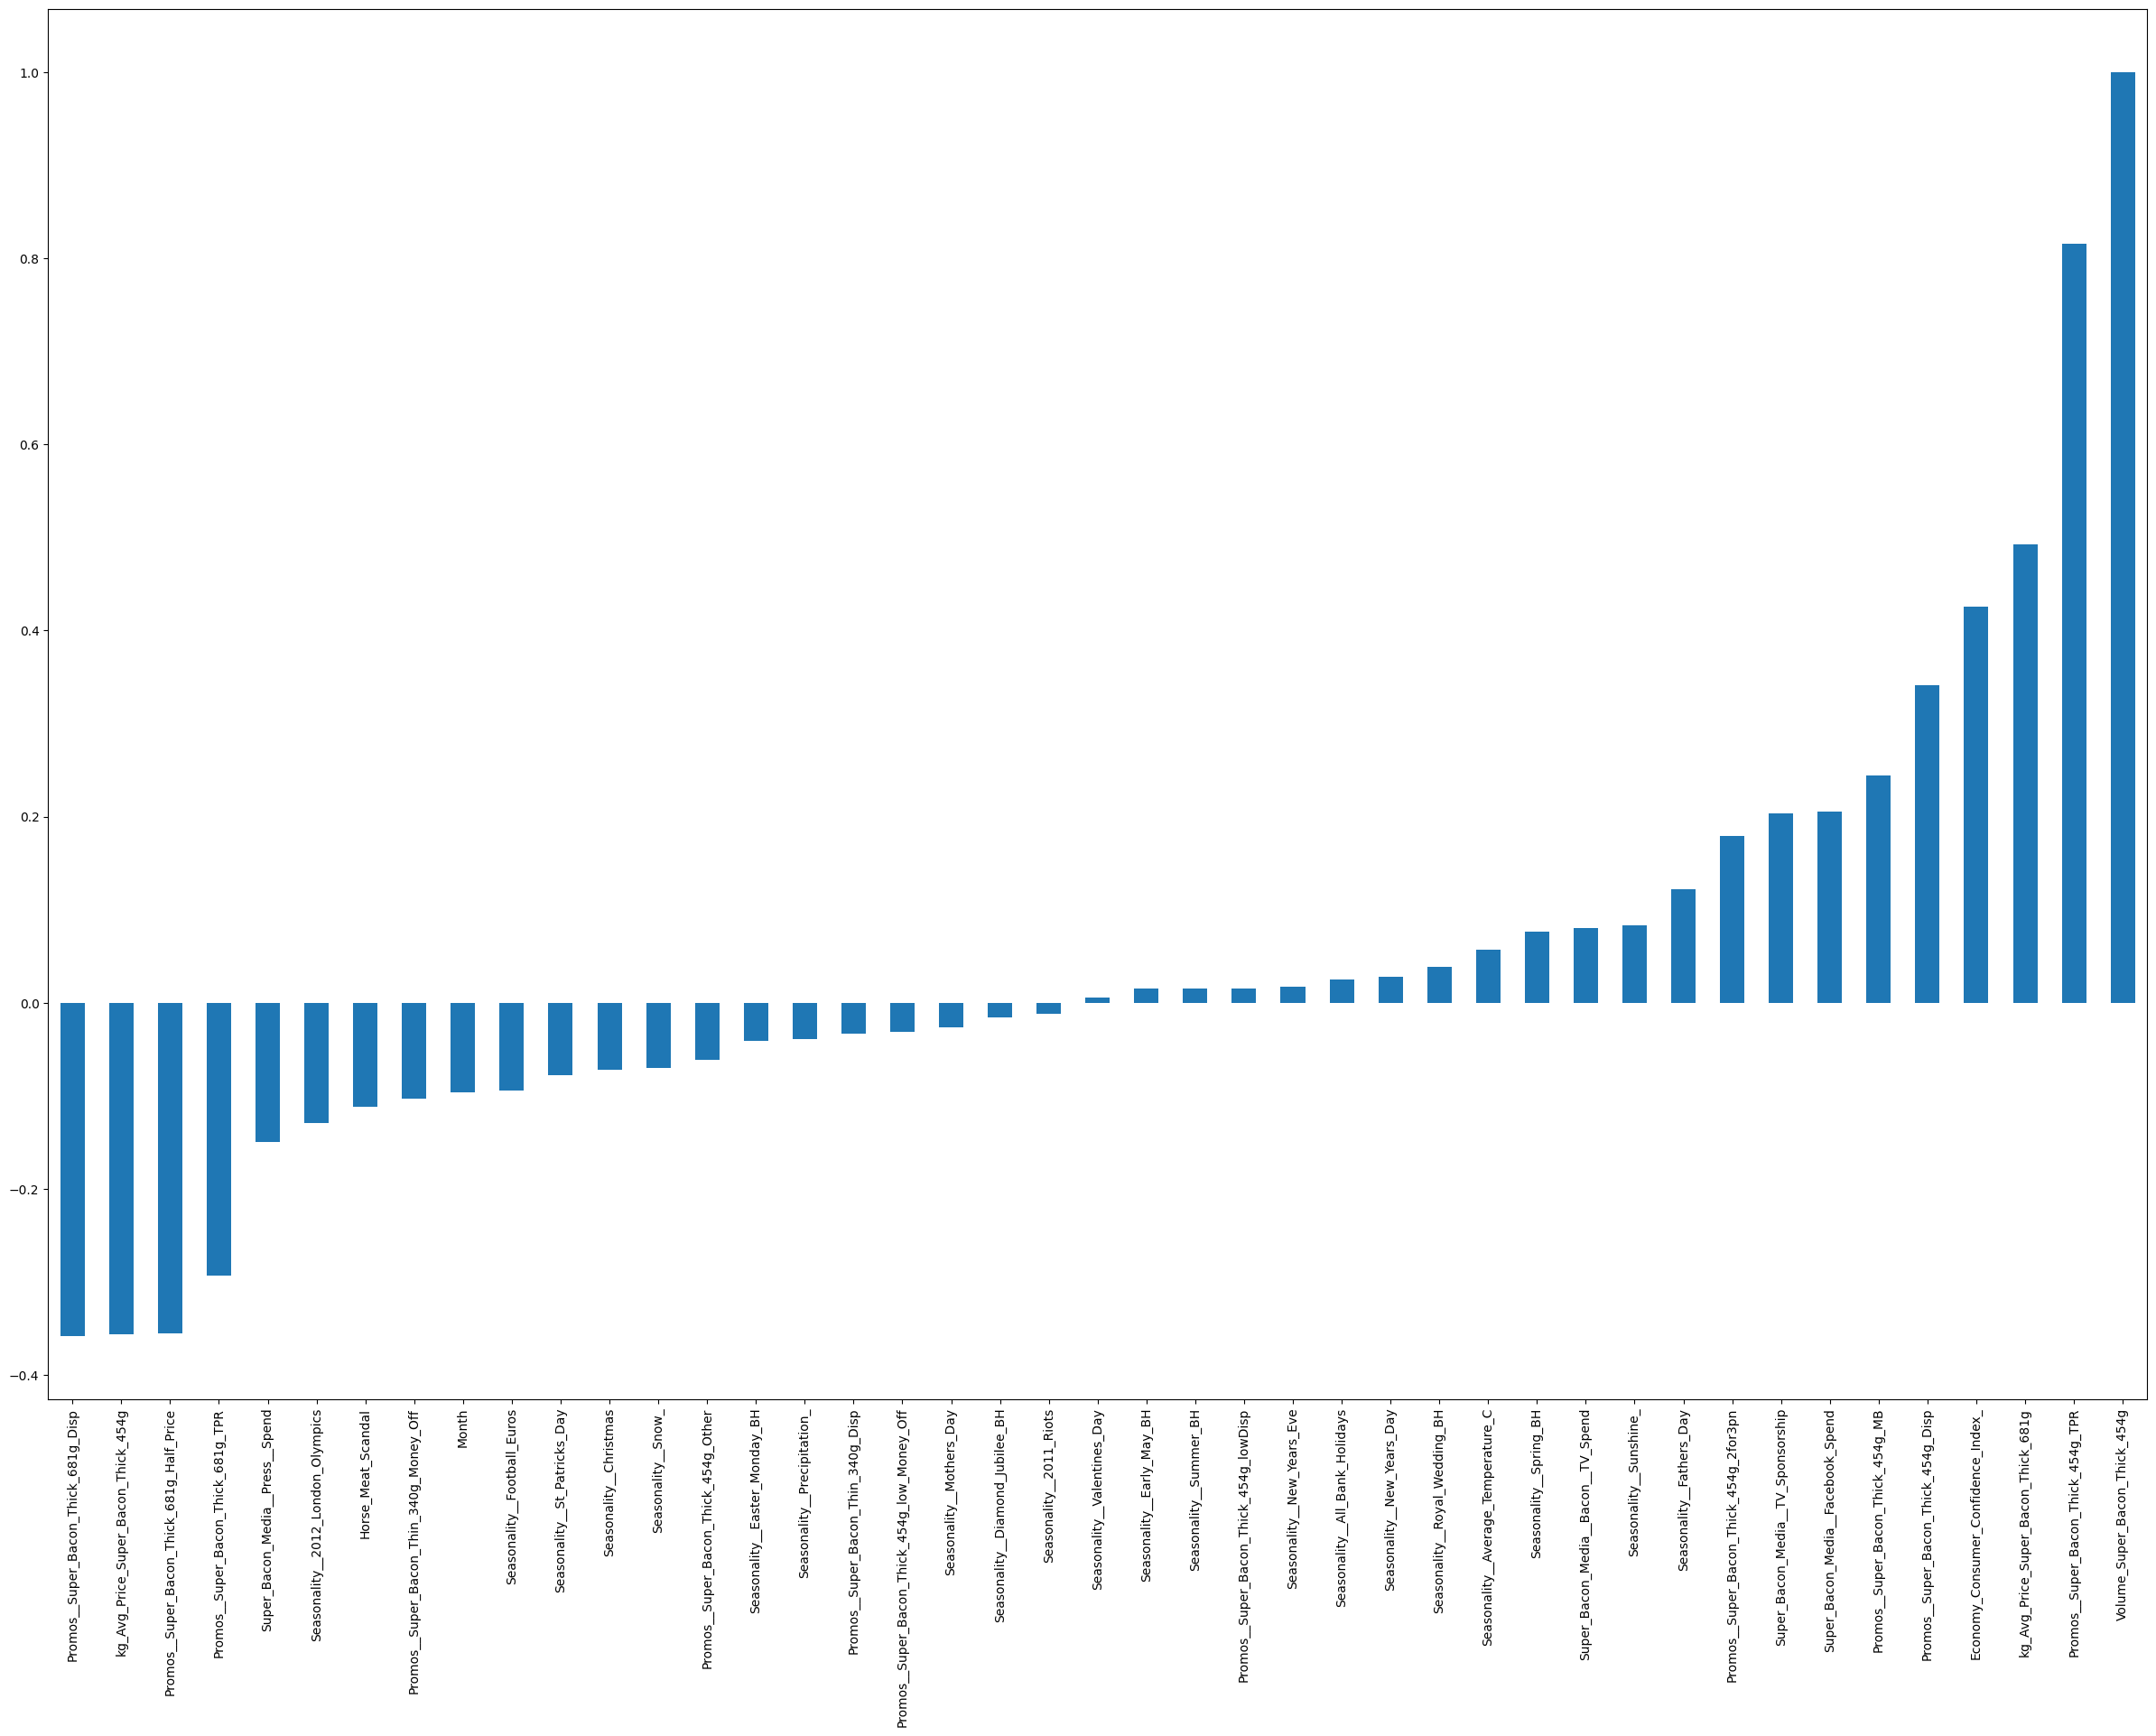

In [38]:
df.corr()['Volume_Super_Bacon_Thick_454g'].sort_values().plot.bar(figsize=(30,20))

# In general subsitute product advertisement leads to lower returns for the 454g super bacon product, there are several factors which will need to be considered in our analysis

In [39]:
# Identify our X and y
y = df['Volume_Super_Bacon_Thick_454g']

<AxesSubplot: xlabel='Date'>

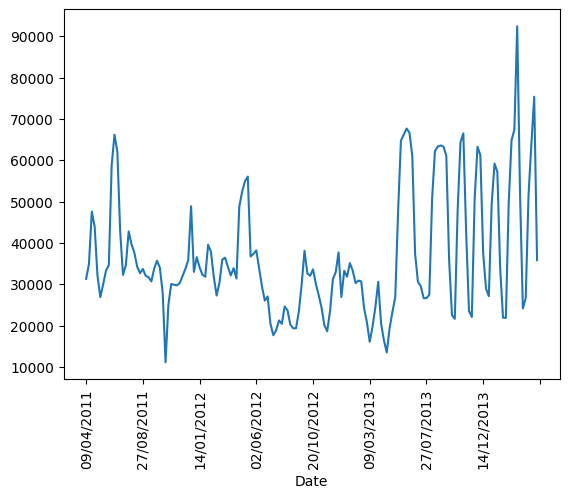

In [40]:
# Plot our dependent variable, there is a lot of volatility toward the end of the year
y.plot(rot=90)

In [41]:
# Create month dummies and concat them to dataframe
dummies = pd.get_dummies(df['Month']).rename(columns=lambda x: 'Month_' + str(x))
df = pd.concat([df, dummies], axis=1)
df.drop(columns=['Month'], inplace=True)

In [42]:
X = df.drop(columns=['Volume_Super_Bacon_Thick_454g'])

In [43]:
# Define all columns to add to OLS model, and create formula input
all_columns = "+".join(df.drop(columns=['Volume_Super_Bacon_Thick_454g']).columns)
my_formula = "Volume_Super_Bacon_Thick_454g~" + all_columns

In [44]:
# Use exponential carryover effects for media spend

df['Super_Bacon_Media__Bacon__TV_Spend'] = ExponentialCarryover().fit_transform(np.array(df['Super_Bacon_Media__Bacon__TV_Spend']).reshape(-1,1))
#df['Super_Bacon_Media__Bacon__TV_Spend'] = ExponentialSaturation().fit_transform(np.array(df['Super_Bacon_Media__Bacon__TV_Spend']).reshape(-1,1))

df['Super_Bacon_Media__Press__Spend'] = ExponentialCarryover().fit_transform(np.array(df['Super_Bacon_Media__Press__Spend']).reshape(-1,1))
#df['Super_Bacon_Media__Press__Spend'] = ExponentialSaturation().fit_transform(np.array(df['Super_Bacon_Media__Press__Spend']).reshape(-1,1))

df['Super_Bacon_Media__Facebook_Spend'] = ExponentialCarryover().fit_transform(np.array(df['Super_Bacon_Media__Facebook_Spend']).reshape(-1,1))
#df['Super_Bacon_Media__Facebook_Spend'] = ExponentialSaturation().fit_transform(np.array(df['Super_Bacon_Media__Facebook_Spend']).reshape(-1,1))

df['Super_Bacon_Media__TV_Sponsorship'] = ExponentialCarryover().fit_transform(np.array(df['Super_Bacon_Media__TV_Sponsorship']).reshape(-1,1))
#df['Super_Bacon_Media__TV_Sponsorship'] = ExponentialSaturation().fit_transform(np.array(df['Super_Bacon_Media__TV_Sponsorship']).reshape(-1,1))

In [45]:
model = sm.OLS.from_formula(formula=my_formula, data = df).fit()

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Volume_Super_Bacon_Thick_454g   R-squared:                       0.938
Model:                                       OLS   Adj. R-squared:                  0.908
Method:                            Least Squares   F-statistic:                     31.19
Date:                           Tue, 21 Feb 2023   Prob (F-statistic):           9.70e-46
Time:                                   00:14:31   Log-Likelihood:                -1540.5
No. Observations:                            160   AIC:                             3187.
Df Residuals:                                107   BIC:                             3350.
Df Model:                                     52                                         
Covariance Type:                       nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     3.198e+04   9888.921      3.234      0.002    1.24e+04    5.16e+04
kg_Avg_Price_Super_Bacon_Thick_454g          -3562.5676   2016.057     -1.767      0.080   -7559.165     434.030
kg_Avg_Price_Super_Bacon_Thick_681g           1413.4738   1620.642      0.872      0.385   -1799.260    4626.207
Promos__Super_Bacon_Thick_454g_lowDisp        1.286e+04   2.81e+04      0.457      0.648   -4.29e+04    6.86e+04
Promos__Super_Bacon_Thick_454g_Disp          -2441.3343   1.08e+04     -0.226      0.821   -2.38e+04    1.89e+04
Promos__Super_Bacon_Thick_454g_Other          1.497e+04   1.11e+04      1.349      0.180   -7028.221     3.7e+04
Promos__Super_Bacon_Thick_454g_low_Money_Off  3.167e+04   1.45e+04      2.192      0.031    3026.084    6.03e+04
Promos__Super_Bacon_Thick_454g_MB             2.803e+05    3.3e+04      8.482      0.000    2.15e+05    3.46e+05
Promos__Super_Bacon_Thick_454g_2for3pn         9.65e+04   1.63e+04      5.933      0.000    6.43e+04    1.29e+05
Promos__Super_Bacon_Thick_454g_TPR            1.856e+05   1.37e+04     13.587      0.000    1.59e+05    2.13e+05
Promos__Super_Bacon_Thick_681g_Disp          -1502.8756   4991.456     -0.301      0.764   -1.14e+04    8392.103
Promos__Super_Bacon_Thick_681g_TPR           -1.362e+04   8687.125     -1.568      0.120   -3.08e+04    3600.273
Promos__Super_Bacon_Thick_681g_Half_Price    -1.397e+04   8591.933     -1.626      0.107    -3.1e+04    3063.019
Promos__Super_Bacon_Thin_340g_Disp            1.452e+04   1.68e+04      0.866      0.389   -1.87e+04    4.78e+04
Promos__Super_Bacon_Thin_340g_Money_Off       1450.1797   6400.387      0.227      0.821   -1.12e+04    1.41e+04
Economy_Consumer_Confidence_Index_            -109.9038     79.189     -1.388      0.168    -266.886      47.079
Horse_Meat_Scandal                              32.3674     42.507      0.761      0.448     -51.897     116.632
Super_Bacon_Media__Bacon__TV_Spend               0.0267      0.021      1.285      0.202      -0.014       0.068
Super_Bacon_Media__Press__Spend                 -0.2931      0.231     -1.270      0.207      -0.751       0.164
Super_Bacon_Media__Facebook_Spend               -0.5635      0.667     -0.845      0.400      -1.886       0.759
Super_Bacon_Media__TV_Sponsorship                0.1121      0.115      0.978      0.330      -0.115       0.339
Seasonality__Average_Temperature_C             442.6145    267.675      1.654      0.101     -88.019     973.248
Seasonality__Snow_                             104.3958     94.221      1.108      0.270     -82.386     291.178
Seasonality__Precipitati

In [47]:
predictions = pd.DataFrame(model.predict(X))
predictions

,0
Date,
09/04/2011,29425.80
16/04/2011,30209.75
23/04/2011,41812.92
30/04/2011,43975.30
07/05/2011,26403.08
...,...
29/03/2014,22470.29
05/04/2014,49744.93
12/04/2014,65928.69


<AxesSubplot: xlabel='Date'>

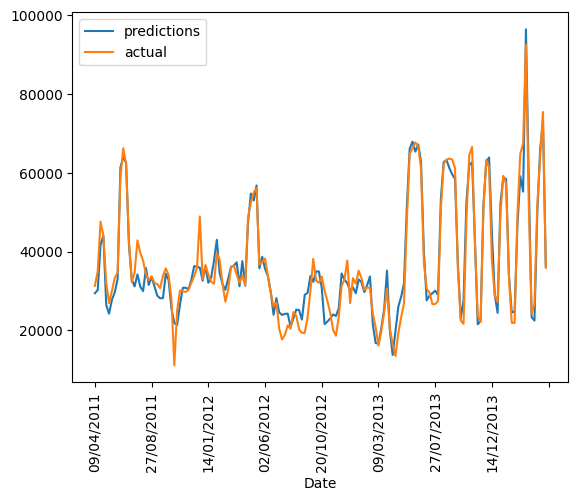

In [48]:
# Create graph

graph = pd.concat([predictions, pd.DataFrame(y)], axis=1)
graph.rename(columns={0:'predictions', 'Volume_Super_Bacon_Thick_454g':'actual'}, inplace=True)
graph[['predictions', 'actual']].plot(rot = 90)

In [49]:
# Rsquared value
model.rsquared

0.9381102846808976

In [50]:
# Results summary and export to csv

results_summary = model.summary()
#results_as_html = results_summary.tables[1]
#pd.DataFrame(results_as_html).to_csv('final_results_unadjusted.csv')

In [51]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Volume_Super_Bacon_Thick_454g   R-squared:                       0.938
Model:                                       OLS   Adj. R-squared:                  0.908
Method:                            Least Squares   F-statistic:                     31.19
Date:                           Tue, 21 Feb 2023   Prob (F-statistic):           9.70e-46
Time:                                   00:14:34   Log-Likelihood:                -1540.5
No. Observations:                            160   AIC:                             3187.
Df Residuals:                                107   BIC:                             3350.
Df Model:                                     52                                         
Covariance Type:                       nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     3.198e+04   9888.921      3.234      0.002    1.24e+04    5.16e+04
kg_Avg_Price_Super_Bacon_Thick_454g          -3562.5676   2016.057     -1.767      0.080   -7559.165     434.030
kg_Avg_Price_Super_Bacon_Thick_681g           1413.4738   1620.642      0.872      0.385   -1799.260    4626.207
Promos__Super_Bacon_Thick_454g_lowDisp        1.286e+04   2.81e+04      0.457      0.648   -4.29e+04    6.86e+04
Promos__Super_Bacon_Thick_454g_Disp          -2441.3343   1.08e+04     -0.226      0.821   -2.38e+04    1.89e+04
Promos__Super_Bacon_Thick_454g_Other          1.497e+04   1.11e+04      1.349      0.180   -7028.221     3.7e+04
Promos__Super_Bacon_Thick_454g_low_Money_Off  3.167e+04   1.45e+04      2.192      0.031    3026.084    6.03e+04
Promos__Super_Bacon_Thick_454g_MB             2.803e+05    3.3e+04      8.482      0.000    2.15e+05    3.46e+05
Promos__Super_Bacon_Thick_454g_2for3pn         9.65e+04   1.63e+04      5.933      0.000    6.43e+04    1.29e+05
Promos__Super_Bacon_Thick_454g_TPR            1.856e+05   1.37e+04     13.587      0.000    1.59e+05    2.13e+05
Promos__Super_Bacon_Thick_681g_Disp          -1502.8756   4991.456     -0.301      0.764   -1.14e+04    8392.103
Promos__Super_Bacon_Thick_681g_TPR           -1.362e+04   8687.125     -1.568      0.120   -3.08e+04    3600.273
Promos__Super_Bacon_Thick_681g_Half_Price    -1.397e+04   8591.933     -1.626      0.107    -3.1e+04    3063.019
Promos__Super_Bacon_Thin_340g_Disp            1.452e+04   1.68e+04      0.866      0.389   -1.87e+04    4.78e+04
Promos__Super_Bacon_Thin_340g_Money_Off       1450.1797   6400.387      0.227      0.821   -1.12e+04    1.41e+04
Economy_Consumer_Confidence_Index_            -109.9038     79.189     -1.388      0.168    -266.886      47.079
Horse_Meat_Scandal                              32.3674     42.507      0.761      0.448     -51.897     116.632
Super_Bacon_Media__Bacon__TV_Spend               0.0267      0.021      1.285      0.202      -0.014       0.068
Super_Bacon_Media__Press__Spend                 -0.2931      0.231     -1.270      0.207      -0.751       0.164
Super_Bacon_Media__Facebook_Spend               -0.5635      0.667     -0.845      0.400      -1.886       0.759
Super_Bacon_Media__TV_Sponsorship                0.1121      0.115      0.978      0.330      -0.115       0.339
Seasonality__Average_Temperature_C             442.6145    267.675      1.654      0.101     -88.019     973.248
Seasonality__Snow_                             104.3958     94.221      1.108      0.270     -82.386     291.178
Seasonality__Precipitati

In [52]:
influence = model.get_influence()

#leverage (hat values)
leverage = influence.hat_matrix_diag

#Cook's D values (and p-values) as tuple of arrays
cooks_d = influence.cooks_distance

#standardized residuals
standardized_residuals = influence.resid_studentized_internal

#studentized residuals
studentized_residuals = influence.resid_studentized_external

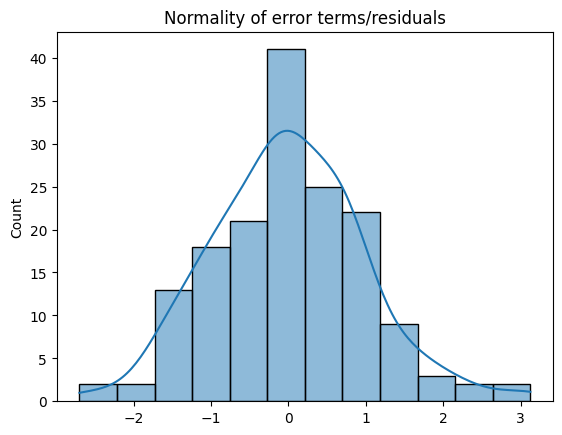

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.histplot(standardized_residuals, kde=True)
p = plt.title('Normality of error terms/residuals')

[Text(0, 0.5, 'Standardised Residuals'), Text(0.5, 0, 'Fitted')]

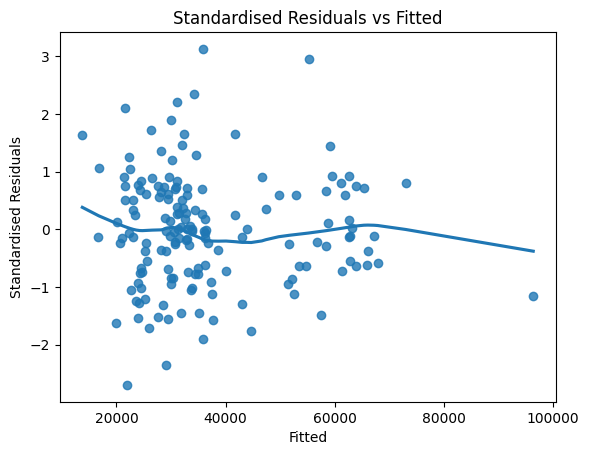

In [54]:
fig, ax = plt.subplots(1, 1)
sns.regplot(y=standardized_residuals,x=np.array(model.predict(X)), lowess=True)
ax.title.set_text('Standardised Residuals vs Fitted')
ax.set(ylabel='Standardised Residuals', xlabel='Fitted')

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Fitted')]

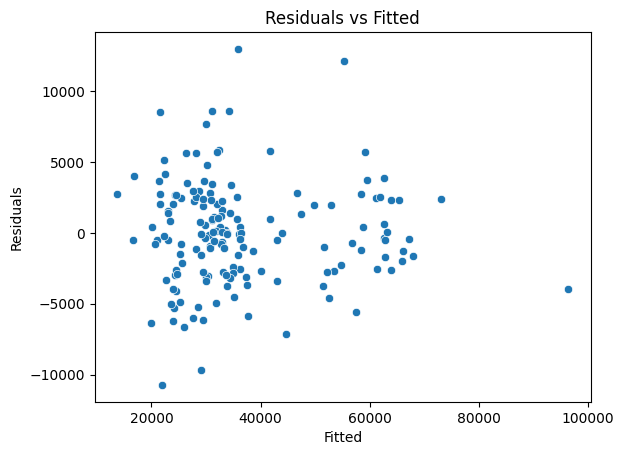

In [55]:
fig, ax = plt.subplots(1, 1)
sns.scatterplot(y=model.resid,x=np.array(model.predict(X)))
ax.title.set_text('Residuals vs Fitted')
ax.set(ylabel='Residuals', xlabel='Fitted')

In [56]:
# VIF Analysis
 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.to_csv('vif_factors.csv')

c:\Users\jai_9\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


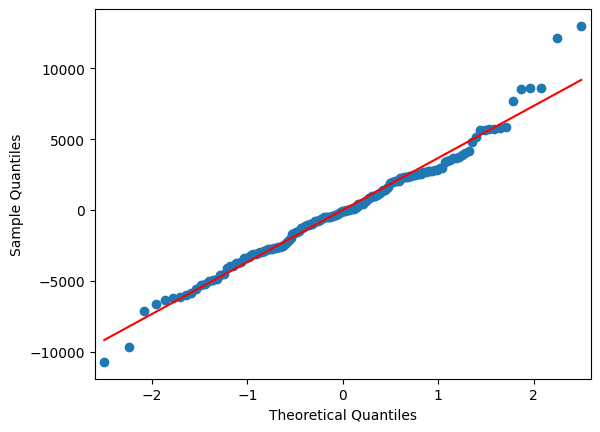

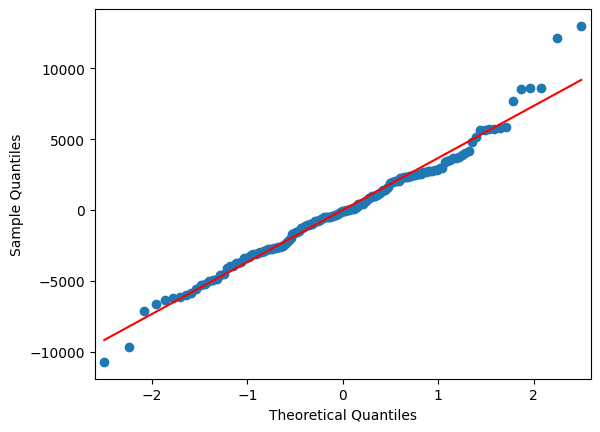

In [57]:
# QQ Plot
fig, ax = plt.subplots(1, 1)
sm.ProbPlot(model.resid).qqplot(line='s', color='#1f77b4', ax=ax)

In [58]:
# Standardise data and run model to estimate real impact of coefficients
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
  
# transform data
scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled, columns = df.columns )

In [59]:
# run standardised model
model = sm.OLS.from_formula(formula=my_formula, data = df_scaled).fit()

In [60]:
# Export standardised results to csv
results_summary = model.summary()
results_as_html = results_summary.tables[1]
pd.DataFrame(results_as_html).to_csv('standardised_full_results.csv')

In [61]:
# parameter values for standardised model
model.params.sort_values(ascending=False)

Promos__Super_Bacon_Thick_454g_TPR              0.84
Promos__Super_Bacon_Thick_454g_MB               0.31
Seasonality__All_Bank_Holidays                  0.22
Promos__Super_Bacon_Thick_454g_2for3pn          0.21
Seasonality__Average_Temperature_C              0.14
Month_12                                        0.10
kg_Avg_Price_Super_Bacon_Thick_681g             0.09
Promos__Super_Bacon_Thick_454g_low_Money_Off    0.09
Month_11                                        0.07
Promos__Super_Bacon_Thick_454g_Other            0.06
Super_Bacon_Media__Bacon__TV_Spend              0.04
Month_2                                         0.04
Seasonality__2011_Riots                         0.04
Seasonality__Snow_                              0.04
Month_4                                         0.04
Seasonality__Royal_Wedding_BH                   0.03
Month_1                                         0.03
Super_Bacon_Media__TV_Sponsorship               0.03
Horse_Meat_Scandal                            

<AxesSubplot: title={'center': 'Standardised Impact Effects On Volume On Bacon 454g'}>

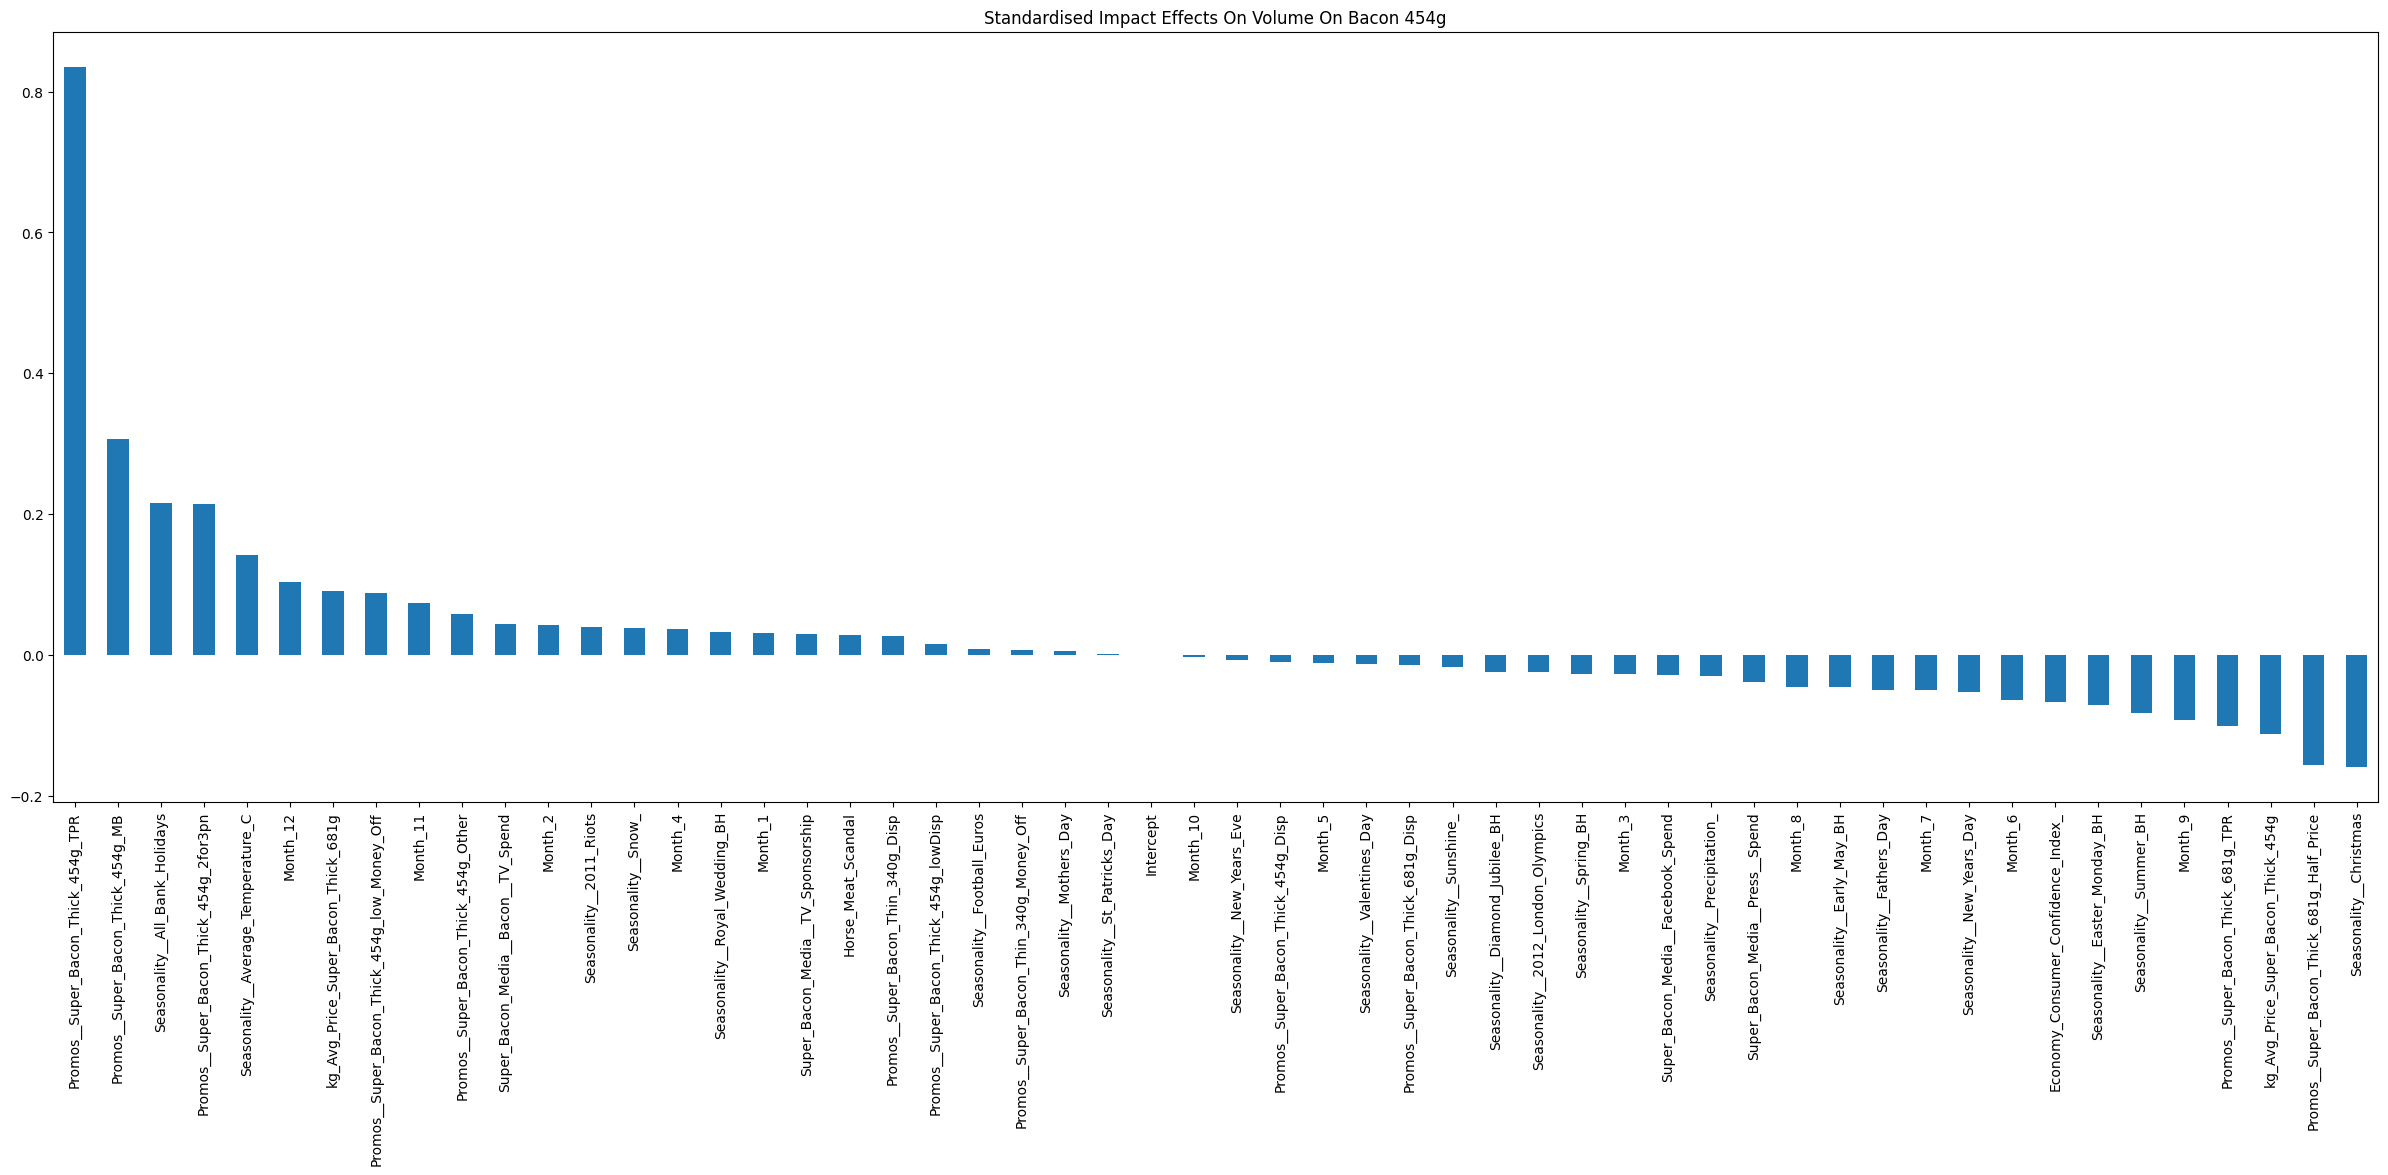

In [62]:
# Standardised impacts chart
model.params.sort_values(ascending=False).plot.bar(figsize = (30,10), title = 'Standardised Impact Effects On Volume On Bacon 454g')

In [44]:
# X = X.assign(trend= range(df.shape[0]))
# Create Trend Column

In [118]:
#non_processed_cols = X.drop(columns=['trend', 'Super Bacon Media Bacon TV Spend', 'Super Bacon Media Press Spend', 'Super Bacon Media TV Sponsorship', 'Horse Meat Scandal'], axis=1)

In [159]:
non_processed_cols = [x for x in non_processed_cols.columns]

AttributeError: 'list' object has no attribute 'columns'

In [120]:
# from time_utils import PowerTrend
# from carryover import ExponentialCarryover
# from saturation import ExponentialSaturation
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline


# preprocess = ColumnTransformer(
#     [
#      ('tv_pipe', Pipeline([
#             ('carryover', ExponentialCarryover()),
#             ('saturation', ExponentialSaturation())
#      ]), ['Super Bacon Media Bacon TV Spend']),
#      ('newspaper_pipe', Pipeline([
#             ('carryover', ExponentialCarryover()),
#             ('saturation', ExponentialSaturation())
#      ]), ['Super Bacon Media Press Spend']),
#      ('facebook_pipe', Pipeline([
#             ('carryover', ExponentialCarryover()),
#             ('saturation', ExponentialSaturation())
#      ]), ['Super Bacon Media Facebook Spend']),
#      ('tv_sponsorship_pipe', Pipeline([
#             ('carryover', ExponentialCarryover()),
#             ('saturation', ExponentialSaturation())
#      ]), ['Super Bacon Media TV Sponsorship']),
#     ('trend', PowerTrend(), ['trend']),
#     ('Horse Meat Scandal', ExponentialCarryover(), ['Horse Meat Scandal']),
    
#     ]
#     ,remainder='passthrough'
# )

# model = Pipeline([
#     ('preprocess', preprocess),
#     ('regression', LinearRegression(
#         positive=True,
#         fit_intercept=False) # no intercept because of the months
#     )
# ])

In [121]:
from time_utils import PowerTrend
from carryover import ExponentialCarryover
from saturation import ExponentialSaturation
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


preprocess = ColumnTransformer(
    [
     
    
    
    ]
    ,remainder='passthrough'
)

model = Pipeline([
    ('preprocess', preprocess),
    ('regression', LinearRegression(
        positive=True,
        fit_intercept=False) # no intercept because of the months
    )
])


In [122]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

tuned_new_model = RandomizedSearchCV(
  model,
  param_distributions={
 
  },
  cv=TimeSeriesSplit(),
  random_state=0,
  n_iter=1000, # some more iterations, takes more time
)

final_model = tuned_new_model.fit(X,y)

c:\Users\jai_9\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=1000. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [123]:
# from scipy.stats import randint, uniform
# from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

# tuned_new_model = RandomizedSearchCV(
#   model,
#   param_distributions={
#     'preprocess__tv_pipe__carryover__window': randint(1, 10),
#     'preprocess__tv_pipe__carryover__strength': uniform(0, 1),
#     'preprocess__tv_pipe__saturation__exponent': uniform(0, 1),
#     'preprocess__newspaper_pipe__carryover__window': randint(1, 10),
#     'preprocess__newspaper_pipe__carryover__strength': uniform(0,1),
#     'preprocess__newspaper_pipe__saturation__exponent': uniform(0, 1),
#     'preprocess__facebook_pipe__carryover__window': randint(1, 10),
#     'preprocess__facebook_pipe__carryover__strength': uniform(0, 1),
#     'preprocess__facebook_pipe__saturation__exponent': uniform(0, 1),
#     'preprocess__tv_sponsorship_pipe__carryover__window': randint(1, 10),
#     'preprocess__tv_sponsorship_pipe__carryover__strength': uniform(0, 1),
#     'preprocess__tv_sponsorship_pipe__saturation__exponent': uniform(0, 1),
#     'preprocess__trend__power': uniform(0, 2),           
#     'preprocess__Horse Meat Scandal__window': randint(1, 10),  
#     'preprocess__Horse Meat Scandal__strength': uniform(0, 1), 
#   },
#   cv=TimeSeriesSplit(),
#   random_state=0,
#   n_iter=1000, # some more iterations, takes more time
# )

# final_model = tuned_new_model.fit(X,y)

<AxesSubplot: xlabel='Date'>

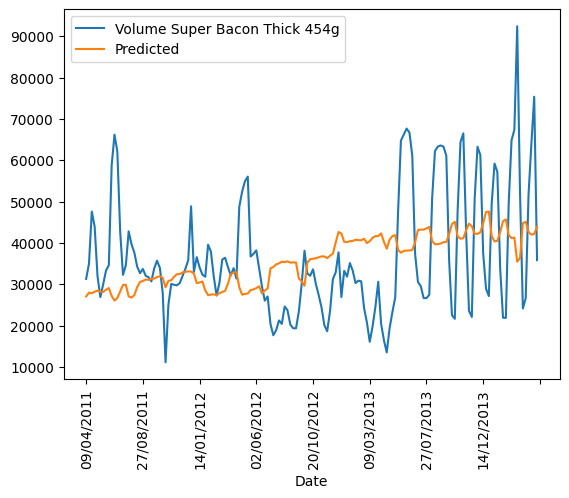

In [124]:
df_fit = pd.DataFrame(y)
df_fit['predicted']=final_model.predict(X)
df_fit.rename(columns={'Sales':'Actual', 'predicted':'Predicted'}, inplace=True)
df_fit.plot(rot = 90)

In [125]:
print(final_model.score(X, y))

-0.15342269167573486


In [126]:
print(final_model.best_params_)

{}


In [127]:
import pandas as pd

best_model = final_model.best_estimator_
pd.Series(
    best_model.named_steps['regression'].coef_,
    index=best_model[:-1].get_feature_names_out()
)


remainder__Month                                   247.032117
remainder__kg Avg Price Super Bacon Thick 454g    5797.718421
remainder__trend                                    98.926427
dtype: float64

In [128]:
from analysis import breakdown

contributions = breakdown(tuned_new_model.best_estimator_, X, y)
contributions

,remainder__Month,remainder__kg Avg Price Super Bacon Thick 454g,remainder__trend,Base
Date,,,,
09/04/2011,1143.380331,30173.119669,0.000000,0.0
16/04/2011,1236.163851,33628.977674,123.758476,0.0
23/04/2011,1686.665684,45586.113433,337.720884,0.0
30/04/2011,1540.834334,41971.684033,462.781633,0.0
07/05/2011,1389.450229,30226.014626,445.135146,0.0
...,...,...,...,...
29/03/2014,437.118787,17143.509069,9044.172143,0.0
05/04/2014,1197.740116,31820.736922,18706.222961,0.0
12/04/2014,1504.512240,38814.294655,23647.993105,0.0


In [129]:
group_channels = {
    'Baseline': ['remainder__Month', 'remainder__trend', 'Base'], 'Seasonality': ['remainder__Seasonality - Average Temperature C', 'remainder__Seasonality - Snow (depth, weekly cm)', 'remainder__Seasonality - Snow (binary if over 3cm)', 'remainder__Seasonality - Precipitation (weekly mm)', 'remainder__Seasonality - Sunshine (Daily Hours)', 'remainder__Seasonality - DFLTA Average Temperature C', 'remainder__Seasonality - DFLTA Snow (depth, weekly cm)', 'remainder__Seasonality - DFLTA Precipitation (weekly mm)', 'remainder__Seasonality - DFLTA Sunshine (Daily Hours)', 'remainder__Seasonality - New Years Day', 'remainder__Seasonality - New Years BH', 'remainder__Seasonality - Valentines Day', 'remainder__Seasonality - Good Friday BH', 'remainder__Seasonality - Easter Monday BH', 'remainder__Seasonality - Spring BH', 'remainder__Seasonality - Summer BH', 'remainder__Seasonality - Christmas Eve', 'remainder__Seasonality - Christmas Day', 'remainder__Seasonality - Christmas BH', 'remainder__Seasonality - Boxing Day', 'remainder__Seasonality - Boxing Day BH', 'remainder__Seasonality - New Years Eve', 'remainder__Seasonality - Royal Wedding BH', 'remainder__Seasonality - Diamond Jubilee BH', 'remainder__Seasonality - All Bank Holidays', 'remainder__Seasonality - 2012 London Olympics', 'remainder__Seasonality - 2011 Riots', 'remainder__Seasonality - Football Euros', 'remainder__Seasonality - Football World Cup and Euros', 'remainder__Seasonality - Mothers Day', 'remainder__Seasonality - Fathers Day', 'remainder__Seasonality - St Patricks Day'], 
    'Promos_454g': ['remainder__Promos - Super Bacon Thick 454g_lowDisp', 'remainder__Promos - Super Bacon Thick 454g_Disp', 'remainder__Promos - Super Bacon Thick 454g_Other', 'remainder__Promos - Super Bacon Thick 454g_low Money Off', 'remainder__Promos - Super Bacon Thick 454g_MB', 'remainder__Promos - Super Bacon Thick 454g_2for3pn', 'remainder__Promos - Super Bacon Thick 454g_TPR'], 'Promos 681g': ['remainder__Promos - Super Bacon Thick 681g_Disp', 'remainder__Promos - Super Bacon Thick 681g_TPR', 'remainder__Promos - Super Bacon Thick 681g_Half Price'], 'Promos_340g': ['remainder__Promos - Super Bacon Thin 340g_Disp', 'remainder__Promos - Super Bacon Thin 340g_Money Off']}

In [130]:
from analysis import breakdown

contributions = breakdown(
    tuned_new_model.best_estimator_,
    X,
    y,
    group_channels
)

KeyError: 'remainder__Seasonality - Average Temperature C'

c:\Users\jai_9\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:807: UserWarning: The label '_remainder__Month' of <matplotlib.collections.PolyCollection object at 0x0000017C5BBC8E10> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)
c:\Users\jai_9\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:807: UserWarning: The label '_remainder__kg Avg Price Super Bacon Thick 454g' of <matplotlib.collections.PolyCollection object at 0x0000017C5BB43410> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)
c:\Users\jai_9\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:807: UserWarning: The label '_remainder__trend' of <matplotlib.collections.PolyCollection object at 0x0000017C57197910> starts with '_'. It is thus excluded from the legend.
  ax.legend(h

(0.0, 92466.59999999999)

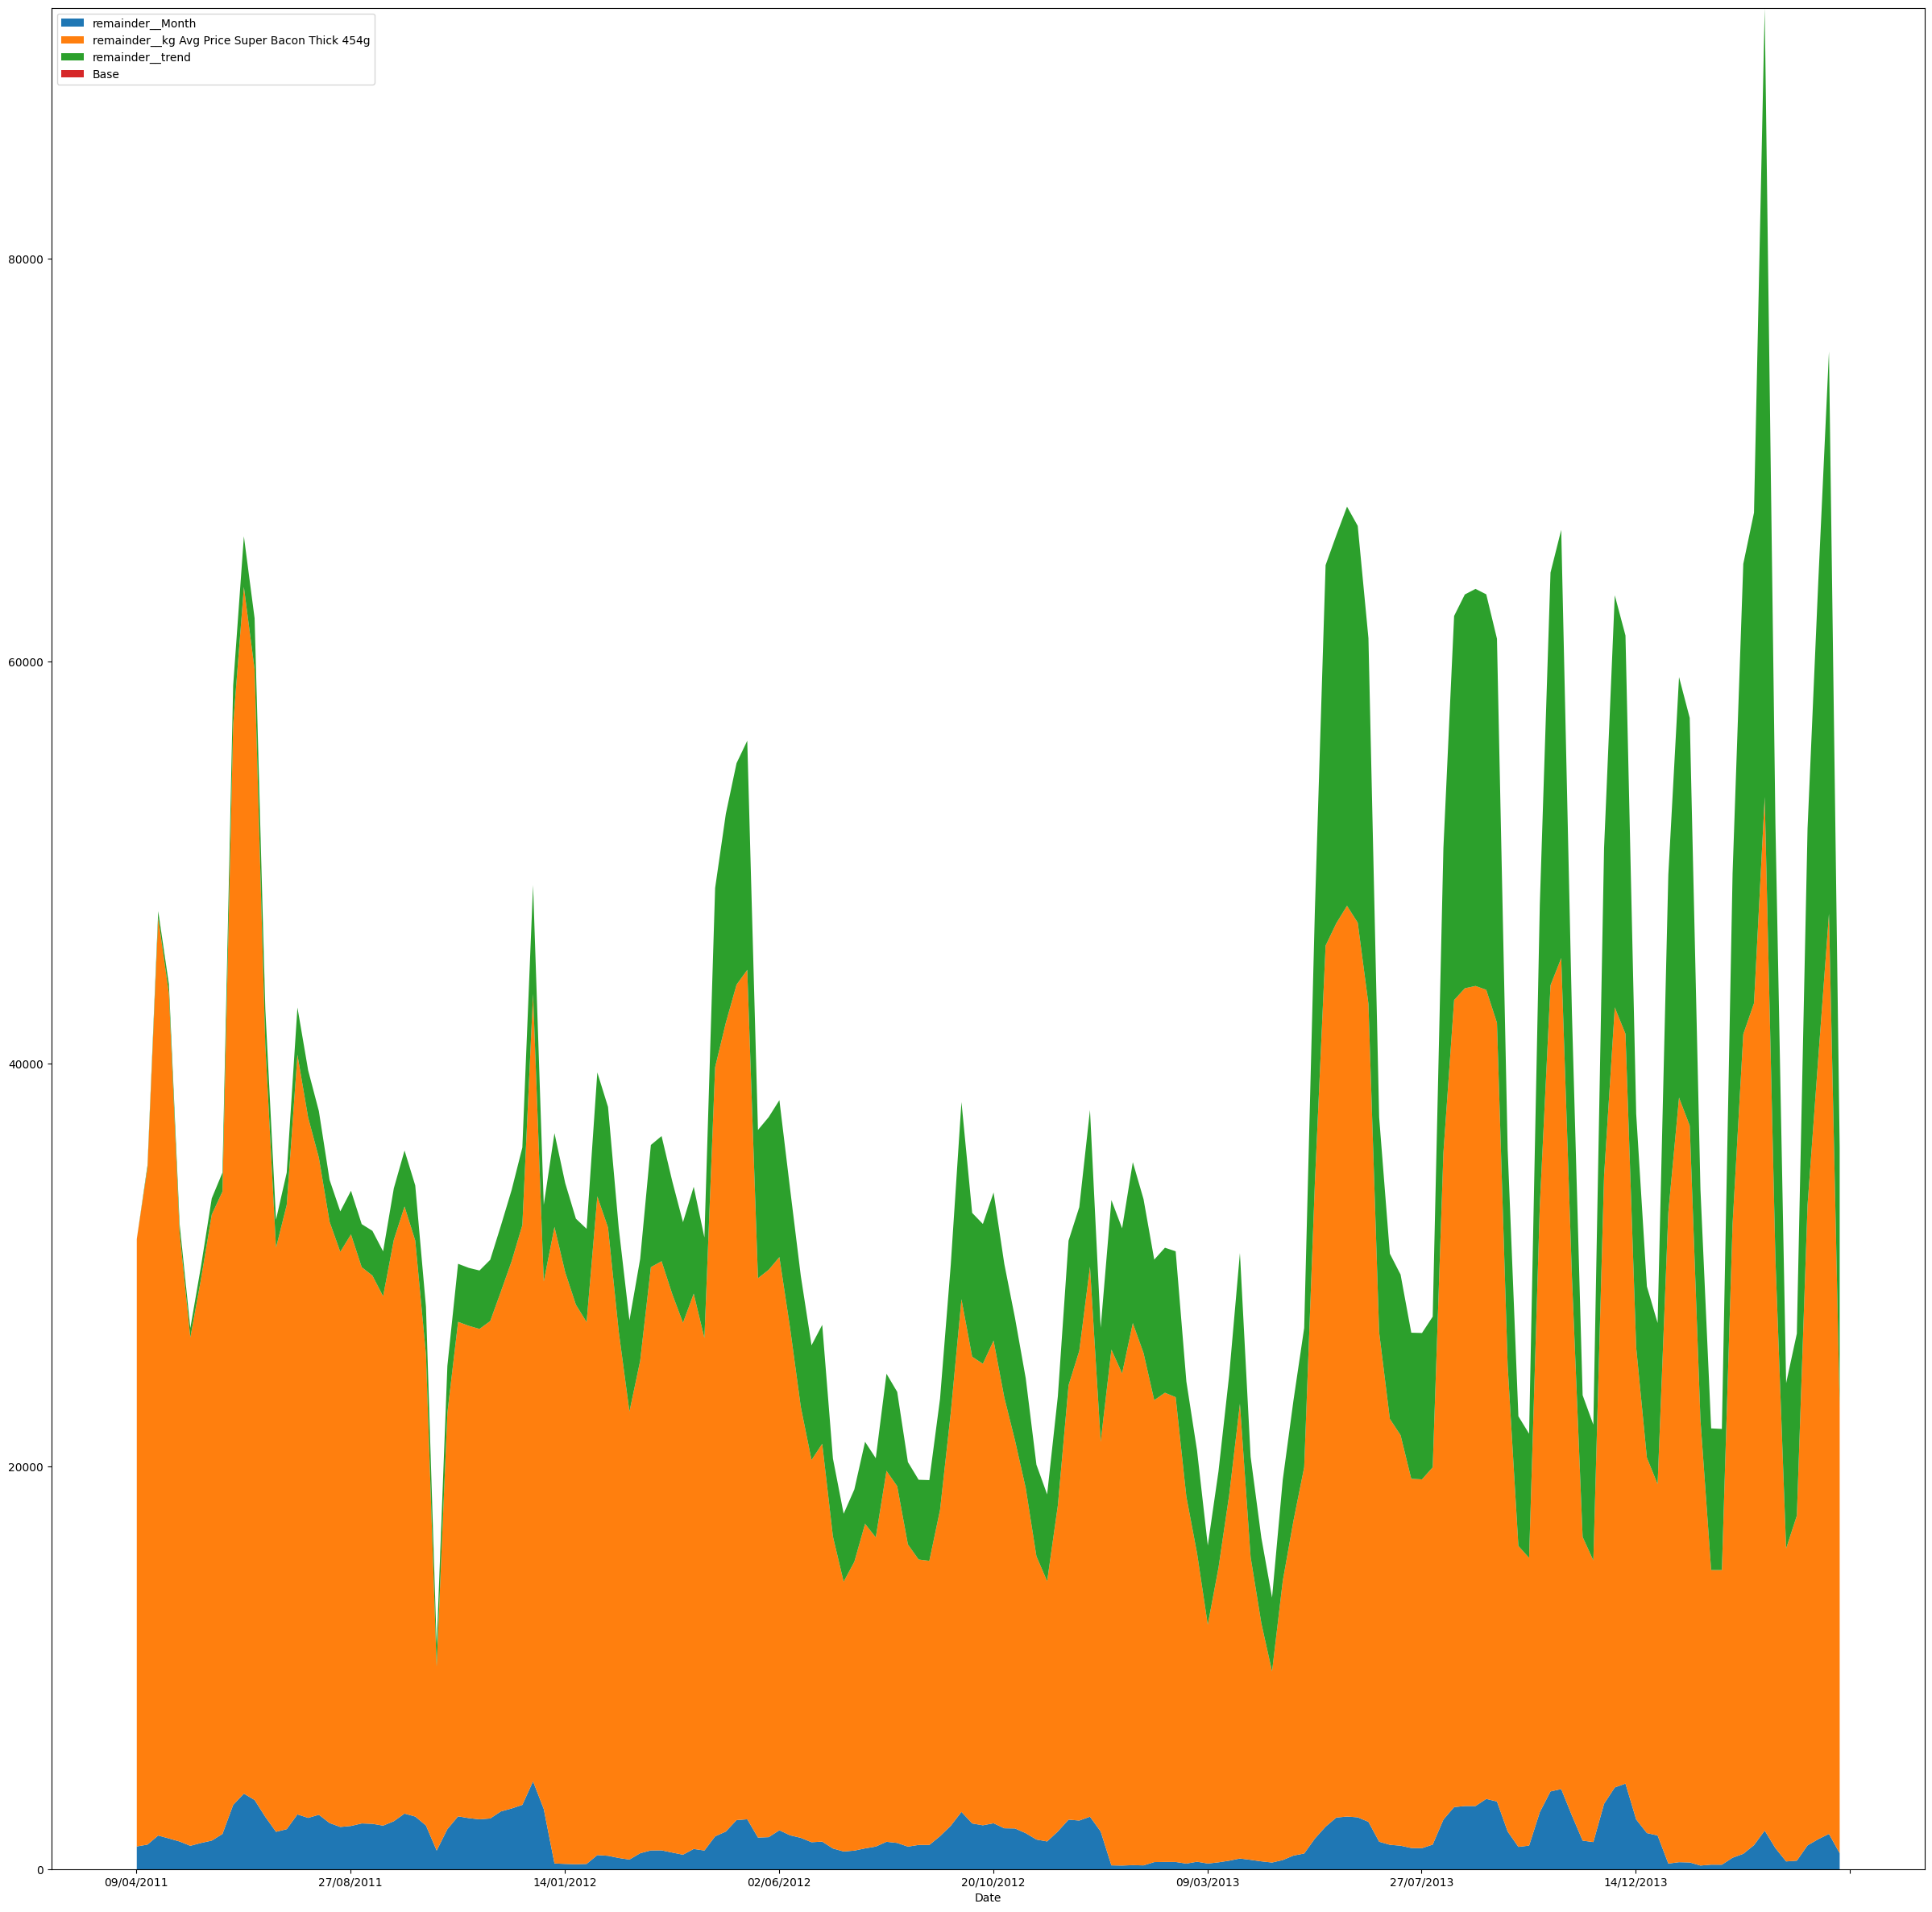

In [131]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# split dataframe df into negative only and positive only values
contributions_neg, contributions_pos = contributions.clip(upper=0), contributions.clip(lower=0)
# stacked area plot of positive values
contributions_pos.plot.area(ax=ax, stacked=True, linewidth=0, figsize=(30,30))
# reset the color cycle
ax.set_prop_cycle(None)
# stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
contributions_neg.rename(columns=lambda x: '_' + x).plot.area(ax=ax, stacked=True, linewidth=0.)
# rescale the y axis
ax.set_ylim([contributions_neg.sum(axis=1).min(), contributions_pos.sum(axis=1).max()])

In [85]:
contributions.to_csv('contributions.csv')

PermissionError: [Errno 13] Permission denied: 'contributions.csv'